###1. Setup


In [1]:
API_KEY = ""
SECRET_KEY = ""

###2. Authenticate

In [2]:
# !pip install python-binance
# !pip install pandas
# !pip install mplfinance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 103 kB 26.0 MB/s 
     |████████████████████████████████| 214 kB 53.9 MB/s 
     |████████████████████████████████| 288 kB 61.3 MB/s 
     |████████████████████████████████| 1.3 MB 44.2 MB/s 
     |████████████████████████████████| 160 kB 61.2 MB/s 
     |████████████████████████████████| 271 kB 70.4 MB/s 
     |████████████████████████████████| 62 kB 722 kB/s 


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpf
client = Client(API_KEY, SECRET_KEY)


###3. Get Tickers

In [4]:
tickers = client.get_all_tickers()
tickers

[{'price': '0.07067700', 'symbol': 'ETHBTC'},
 {'price': '0.00313200', 'symbol': 'LTCBTC'},
 {'price': '0.00852800', 'symbol': 'BNBBTC'},
 {'price': '0.00068500', 'symbol': 'NEOBTC'},
 {'price': '0.00301900', 'symbol': 'QTUMETH'},
 {'price': '0.00102800', 'symbol': 'EOSETH'},
 {'price': '0.00001986', 'symbol': 'SNTETH'},
 {'price': '0.00097200', 'symbol': 'BNTETH'},
 {'price': '0.07908100', 'symbol': 'BCCBTC'},
 {'price': '0.00013890', 'symbol': 'GASBTC'},
 {'price': '0.12060000', 'symbol': 'BNBETH'},
 {'price': '62490.60000000', 'symbol': 'BTCUSDT'},
 {'price': '4416.99000000', 'symbol': 'ETHUSDT'},
 {'price': '0.00041400', 'symbol': 'HSRBTC'},
 {'price': '0.00017780', 'symbol': 'OAXETH'},
 {'price': '0.00002801', 'symbol': 'DNTETH'},
 {'price': '0.00577200', 'symbol': 'MCOETH'},
 {'price': '0.00166300', 'symbol': 'ICNETH'},
 {'price': '0.00021140', 'symbol': 'MCOBTC'},
 {'price': '0.00001531', 'symbol': 'WTCBTC'},
 {'price': '0.00023700', 'symbol': 'WTCETH'},
 {'price': '0.00000849',

In [5]:
tickers_df = pd.DataFrame(tickers)
tickers_df.head()


,symbol,price
0,ETHBTC,0.07067700
1,LTCBTC,0.00313200
2,BNBBTC,0.00852800
3,NEOBTC,0.00068500
4,QTUMETH,0.00301900


In [6]:
tickers_df.set_index('symbol', inplace=True)


In [7]:
tickers_df.loc['POABTC']

price    0.00000038
Name: POABTC, dtype: object

###4 . Get Depth

In [8]:
depth = client.get_order_book(symbol='POABTC')
depth

{'asks': [['0.00000038', '457568.00000000'],
  ['0.00000039', '673412.00000000'],
  ['0.00000040', '1393005.00000000'],
  ['0.00000041', '403015.00000000'],
  ['0.00000042', '1111292.00000000'],
  ['0.00000043', '583683.00000000'],
  ['0.00000044', '438356.00000000'],
  ['0.00000045', '2131645.00000000'],
  ['0.00000046', '418693.00000000'],
  ['0.00000047', '372268.00000000'],
  ['0.00000048', '2646708.00000000'],
  ['0.00000049', '711584.00000000'],
  ['0.00000050', '571753.00000000'],
  ['0.00000051', '177675.00000000'],
  ['0.00000052', '204828.00000000'],
  ['0.00000053', '288530.00000000'],
  ['0.00000054', '420250.00000000'],
  ['0.00000055', '666229.00000000'],
  ['0.00000056', '495716.00000000'],
  ['0.00000057', '127591.00000000'],
  ['0.00000058', '263221.00000000'],
  ['0.00000059', '671505.00000000'],
  ['0.00000060', '2806174.00000000'],
  ['0.00000061', '97887.00000000'],
  ['0.00000062', '738265.00000000'],
  ['0.00000063', '74963.00000000'],
  ['0.00000064', '366172.00

In [9]:
depth_df = pd.DataFrame(depth['asks'])

In [10]:
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,0.00000038,457568.00000000
1,0.00000039,673412.00000000
2,0.00000040,1393005.00000000
3,0.00000041,403015.00000000
4,0.00000042,1111292.00000000


###5 . Get Historical

In [88]:
import datetime 
numeric_columns= ['Open','High','Low','Close','Volume','Quote Asset Volume',
                  'Taker Buy Base Asset Volume','Taker Buy Quote Asset Volume']
def get_historical_of(courrency, date='01-01-2017',end = datetime.date.today()):
  d = datetime.datetime.strptime(str(end), '%Y-%m-%d')
  d.strftime('%d-%m-%Y')
  histo_df = pd.DataFrame(client.get_historical_klines('POABTC', client.KLINE_INTERVAL_1DAY, date,str(end)))
  histo_df.columns = ['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','Taker Buy Base Asset Volume','Taker Buy Quote Asset Volume','Ignore']
  histo_df['Open Time'] = pd.to_datetime(histo_df['Open Time']/1000, unit = 's')
  histo_df['Close Time'] = pd.to_datetime(histo_df['Close Time']/1000, unit = 's')
  histo_df[numeric_columns] = histo_df[numeric_columns].apply(pd.to_numeric, axis = 1)
  return histo_df
# historical = client.get_historical_klines('POABTC', client.KLINE_INTERVAL_1DAY)
''''
[
  [
    Open time,
    Opne
    High,
    Low,
    Close,
    Volume,
    Close time,
    Quote asset volume,
    Number of trades,
    Taker buy base asset volume,
    Taker buy quote asset volume,
    Ignore

  ]
]
'''


"'\n[\n  [\n    Open time,\n    Opne\n    High,\n    Low,\n    Close,\n    Volume,\n    Close time,\n    Quote asset volume,\n    Number of trades,\n    Taker buy base asset volume,\n    Taker buy quote asset volume,\n    Ignore\n\n  ]\n]\n"

In [89]:
historical_df = pd.DataFrame(historical)
historical_df.columns = ['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','Taker Buy Base Asset Volume','Taker Buy Quote Asset Volume','Ignore']
historical_df.head()


NameError: ignored

In [ ]:
historical_df.shape

In [ ]:
historical_df.info()

###6 . Preprocess Historical Data

In [ ]:
#Trasforma il tempo in date

historical_df['Open Time'] = pd.to_datetime(historical_df['Open Time']/1000, unit = 's')
historical_df['Close Time'] = pd.to_datetime(historical_df['Close Time']/1000, unit = 's')

In [90]:
historical_df.tail()

NameError: ignored

In [ ]:
historical_df.dtypes

In [ ]:
historical_df[numeric_columns] = historical_df[numeric_columns].apply(pd.to_numeric, axis = 1)
historical_df.dtypes

In [91]:
historical_df.describe()

NameError: ignored

###7 . Viz

In [92]:
mpf.plot(historical_df.set_index('Close Time').tail(100), type='candle', style='charles', mav=(10,20,30))

NameError: ignored

###8 . Data cleaning

In [93]:
# !pip install numpy
# !pip install scikit-learn
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [94]:
data = pd.DataFrame(get_historical_of('POABTC','01-01-2017'))
data

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2018-02-28,1.760000e-04,1.760000e-04,4.581000e-05,6.136000e-05,90096419.0,2018-02-28 23:59:59.999000072,5420.030066,112005,41874213.0,2518.965772,0
1,2018-03-01,6.136000e-05,6.334000e-05,5.183000e-05,5.289000e-05,35023191.0,2018-03-01 23:59:59.999000072,1993.612443,56588,15370217.0,875.521762,0
2,2018-03-02,5.289000e-05,5.289000e-05,4.600000e-05,4.666000e-05,15628521.0,2018-03-02 23:59:59.999000072,755.319458,33694,6224123.0,301.143898,0
3,2018-03-03,4.666000e-05,4.683000e-05,3.673000e-05,3.992000e-05,16800437.0,2018-03-03 23:59:59.999000072,691.412156,23553,7392159.0,304.451417,0
4,2018-03-04,3.993000e-05,4.500000e-05,3.939000e-05,4.144000e-05,8778462.0,2018-03-04 23:59:59.999000072,373.669563,16619,3860601.0,164.176663,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2021-10-25,6.400000e-07,6.400000e-07,6.200000e-07,6.300000e-07,5331150.0,2021-10-25 23:59:59.999000072,3.336084,986,2322229.0,1.464923,0
1336,2021-10-26,6.200000e-07,6.400000e-07,6.200000e-07,6.200000e-07,6340330.0,2021-10-26 23:59:59.999000072,3.966680,1143,2691883.0,1.697330,0
1337,2021-10-27,6.300000e-07,6.500000e-07,5.800000e-07,5.900000e-07,9190930.0,2021-10-27 23:59:59.999000072,5.608618,1450,3554084.0,2.181889,0
1338,2021-10-28,5.900000e-07,6.000000e-07,5.300000e-07,5.700000e-07,22341370.0,2021-10-28 23:59:59.999000072,12.586810,3063,8479820.0,4.827673,0


In [95]:
data_training = data[data['Open Time']<'01-01-2020'].copy()
data_test = data[data['Open Time']>'01-01-2020'].copy().copy()

In [96]:
training_data = data_training.drop(['Open Time','Close Time'],axis=1)
cripto_val = data_training[['Open','High','Low','Close','Volume']]
cripto_val.tail()


,Open,High,Low,Close,Volume
667,0.000002,0.000002,0.000002,0.000002,4268571.0
668,0.000002,0.000002,0.000002,0.000002,6510342.0
669,0.000002,0.000002,0.000002,0.000002,7461113.0
670,0.000002,0.000002,0.000002,0.000002,1974876.0
671,0.000002,0.000002,0.000002,0.000002,19302130.0


In [97]:
data_training = data.copy()#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
cripto_val = scaler.fit_transform(cripto_val)
cripto_val

array([[1.        , 1.        , 0.56025078, 0.6764805 , 0.21850295],
       [0.3443148 , 0.35538136, 0.63573668, 0.58130127, 0.08350899],
       [0.29587051, 0.29558849, 0.56263323, 0.5112934 , 0.03596932],
       ...,
       [0.0024022 , 0.00240316, 0.00476489, 0.00438251, 0.0159496 ],
       [0.00223061, 0.00200263, 0.00514107, 0.00471963, 0.00250189],
       [0.0024022 , 0.0028609 , 0.00551724, 0.00539386, 0.04497397]])

In [98]:

X_train = [] 
Y_train = []
cripto_val.shape


(672, 5)

In [99]:

for i in range(60, cripto_val.shape[0]):
 X_train.append(cripto_val[i-60:i])
 Y_train.append(cripto_val[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape


(612, 60, 5)

In [100]:
print(Y_train)
print(X_train)

[4.35255090e-01 4.60192176e-01 4.13692519e-01 4.19926790e-01
 4.44063143e-01 4.30793869e-01 4.43662777e-01 4.43205216e-01
 4.16781057e-01 4.43891558e-01 4.44749485e-01 5.08979639e-01
 4.61050103e-01 4.43376802e-01 4.25131549e-01 4.44978266e-01
 4.28048501e-01 4.08716541e-01 3.84351407e-01 3.46945779e-01
 3.52894075e-01 3.58442004e-01 3.54781515e-01 3.37394189e-01
 2.91638069e-01 2.77167696e-01 2.86490506e-01 2.92667582e-01
 2.76710135e-01 2.72363304e-01 2.50228781e-01 2.65557081e-01
 2.89293068e-01 2.98387097e-01 2.85918554e-01 2.90265385e-01
 2.80942576e-01 2.65099520e-01 2.65271105e-01 2.76767330e-01
 2.75909403e-01 2.56806223e-01 2.38389385e-01 2.16712423e-01
 2.18885838e-01 1.92232899e-01 1.89144361e-01 2.00869366e-01
 2.02242050e-01 2.00411805e-01 1.89201556e-01 1.88801190e-01
 1.91088996e-01 1.82738504e-01 1.75703500e-01 1.60546786e-01
 1.54484100e-01 1.47220316e-01 1.60318005e-01 1.51338367e-01
 1.42358728e-01 1.40528483e-01 1.43045070e-01 1.49736902e-01
 1.67067033e-01 1.793639

###10. Implement RNN model
LSTM model

In [101]:
!pip install Tensorflow


In [102]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [103]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [104]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)


Epoch 1/20
11/11 [==============================] - 5s 195ms/step - loss: 0.0071 - val_loss: 0.0017
Epoch 2/20
11/11 [==============================] - 2s 144ms/step - loss: 0.0017 - val_loss: 1.8586e-05
Epoch 3/20
11/11 [==============================] - 2s 143ms/step - loss: 0.0014 - val_loss: 2.7835e-04
Epoch 4/20
11/11 [==============================] - 2s 145ms/step - loss: 0.0016 - val_loss: 4.3616e-04
Epoch 5/20
11/11 [==============================] - 2s 145ms/step - loss: 0.0014 - val_loss: 1.6708e-04
Epoch 6/20
11/11 [==============================] - 2s 144ms/step - loss: 0.0013 - val_loss: 1.2962e-04
Epoch 7/20
11/11 [==============================] - 2s 148ms/step - loss: 0.0011 - val_loss: 6.6111e-05
Epoch 8/20
11/11 [==============================] - 2s 148ms/step - loss: 0.0014 - val_loss: 6.0021e-05
Epoch 9/20
11/11 [==============================] - 2s 148ms/step - loss: 9.2114e-04 - val_loss: 6.5681e-05
Epoch 10/20
11/11 [==============================] - 2s 146ms/st

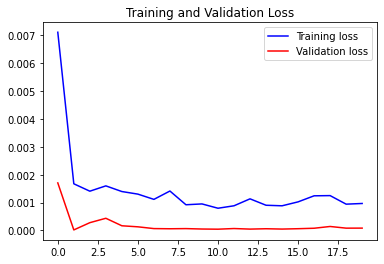

In [105]:
# !pip install pyplot
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()